In [1]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
import utils as ut
from rumex_dataset import RumexDataset
from rumex_model import RumexNet
from torch_lr_finder import LRFinder
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir = '/u/21/hiremas1/unix/postdoc/rumex/data_for_fastai_cleaned/'
path_tr = os.path.join(data_dir, 'train')


Bad key "text.kerning_factor" on line 4 in
/u/21/hiremas1/unix/anaconda3/envs/rumex_pl_latest/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Weight decay and batch size experiments

## Alexnet Conclusion: 
- Weight decay is required. Otherwise the training is not stable (compare first and second graphs below
- Tried batch sizes (16, 32, 50, 64). Good batch size is 50 or 64: see graphs 2-8
- LR finder step_mode='exp' better than step_mode='linear'
- best lr=7e-4

### No weight decay, bs=50

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


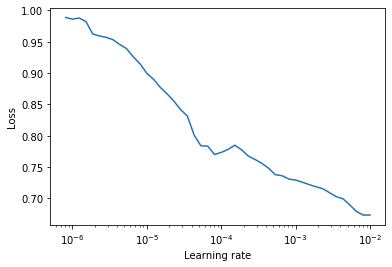

In [2]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=50)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'alexnet'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

### weight decay=1e-2, bs=50, trial 1

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


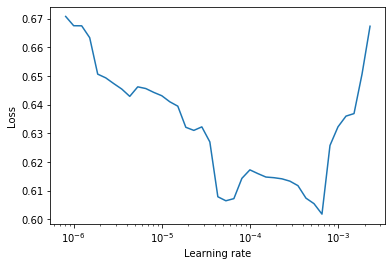

In [3]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=50)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'alexnet'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

### weight decay=1e-2, bs=50, trial 2

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


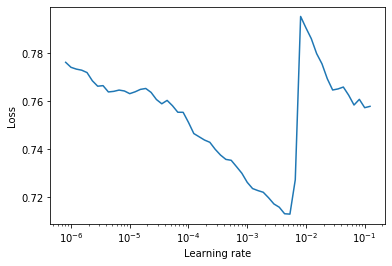

In [2]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'alexnet'
model = RumexNet(model_name)
optimizer = torch.optim.SGD(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


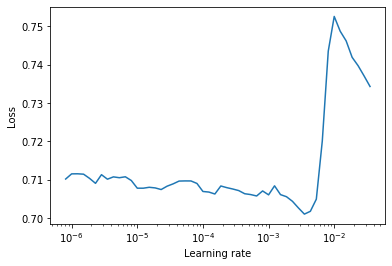

In [3]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'alexnet'
model = RumexNet(model_name)
optimizer = torch.optim.SGD(model.parameters(), lr=1.0e-5)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# weight decay=1e-2, bs=50, trial 3

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


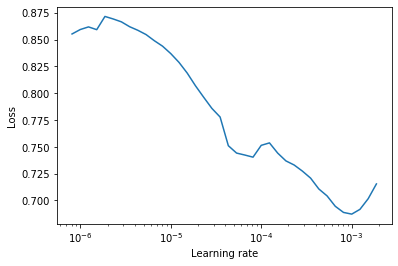

In [2]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=50)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'alexnet'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# bs=64

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


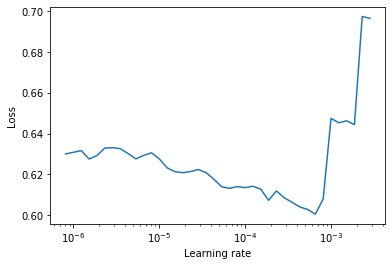

In [4]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
model_name = 'alexnet'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


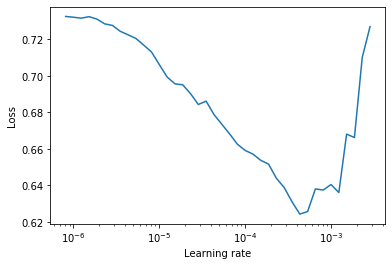

In [10]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
model_name = 'alexnet'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# bs = 32

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


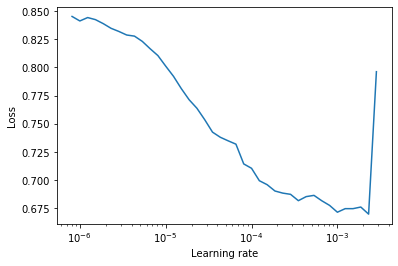

In [5]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=32)
model_name = 'alexnet'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# bs = 16

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


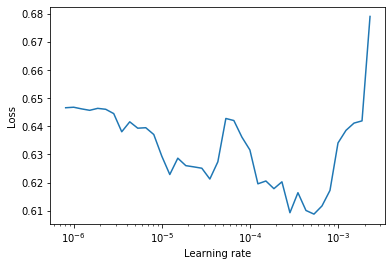

In [6]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=16)
model_name = 'alexnet'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# bs = 100

55%|█████▌    | 55/100 [01:17<01:03,  1.41s/it]Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



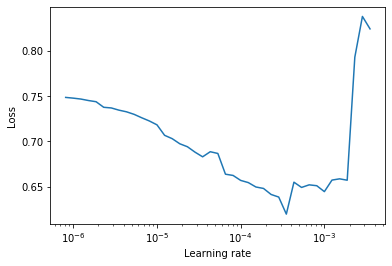

In [7]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=100)
model_name = 'alexnet'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# Resnet50 Conclusions:
- wd is required
- bs 64 works best
- best lr=7e-4

### no weight decay, bs = 50

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


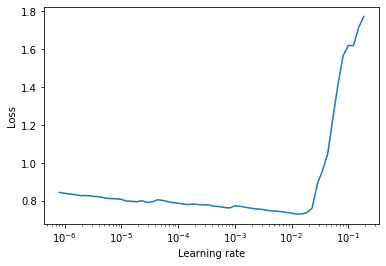

In [4]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=50)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'resnet50'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## bs=64, wd=1e-2

In [5]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'resnet50'
model = RumexNet(model_name)
optimizer = torch.optim.SGD(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

KeyboardInterrupt: 

## bs = 32, no wd

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


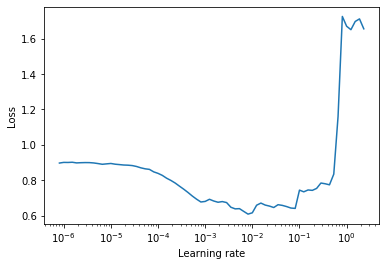

In [7]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=32)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'resnet50'
model = RumexNet(model_name)
optimizer = torch.optim.SGD(model.parameters(), lr=1.0e-7)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## bs = 32, wd=1e-2

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


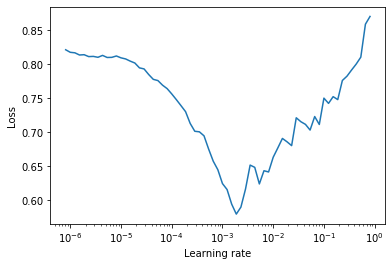

In [8]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=32)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'resnet50'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## bs=64, wd=1e-2

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


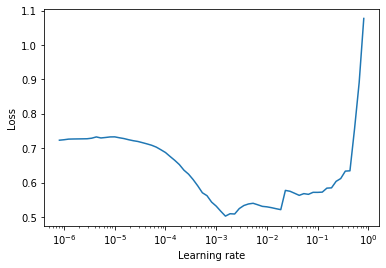

In [9]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'resnet50'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## Mobilenet Conclusions
- bs=64 and 32 curves are very similar
- best lr = 1e-3

## bs=64, wd=1e-2

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


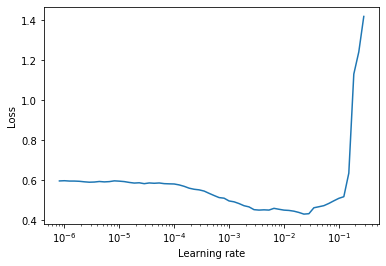

In [11]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'mobilenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## bs=32, wd=1e-2

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


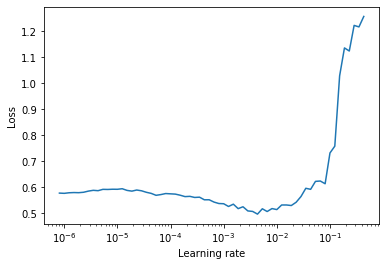

In [12]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=32)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'mobilenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## Shufflenet conclusions:
- wd=0 has consistant performance
- best lr = 5e-3

## bs=64, wd=1e-2 trial 1

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


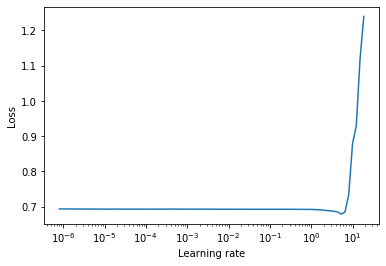

In [2]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'shufflenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.SGD(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## bs=64, wd=1e-2 trial 2

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


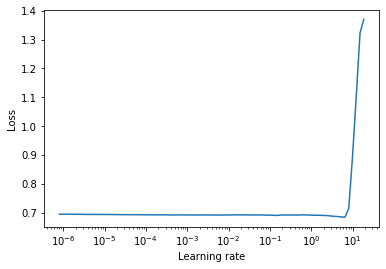

In [3]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'shufflenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.RMSprop(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## bs=64, wd=1e-2 trial 3

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


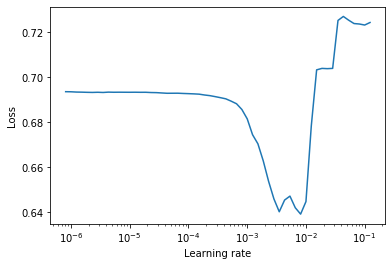

In [5]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'shufflenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.RMSprop(model.parameters(), lr=1.0e-7)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


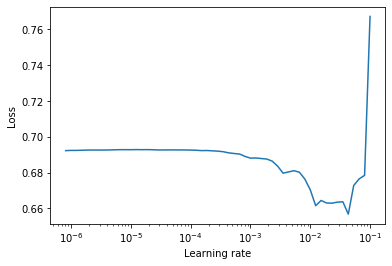

In [7]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'shufflenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.RMSprop(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## bs=64, wd=0 trial 1

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


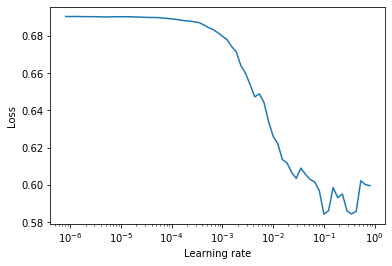

In [3]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'shufflenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## bs=64, wd=0 trial 2

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


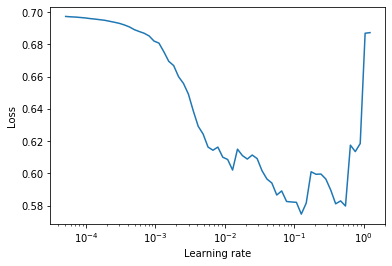

In [4]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'shufflenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-5)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## bs=64, wd=0 trial 3

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


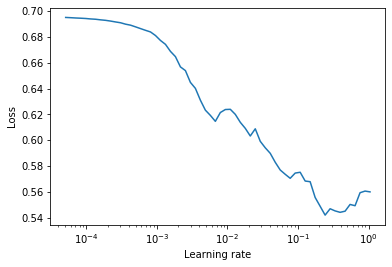

In [7]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'shufflenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-5)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## bs=32, wd=0 trial 1

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


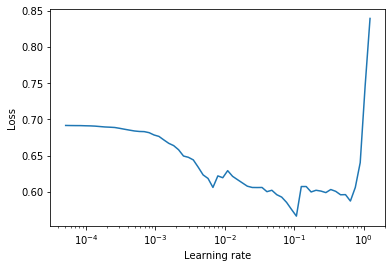

In [8]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=32)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'shufflenet_v2'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-5)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

## Mnasnset conclusions
- wd required
- best lr = 5e-2
- 

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


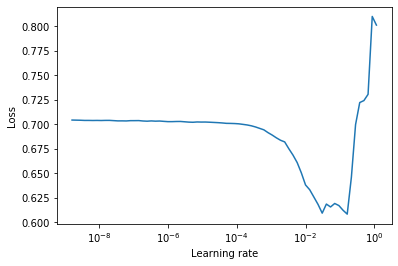

In [9]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'mnasnet0_5'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-10)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


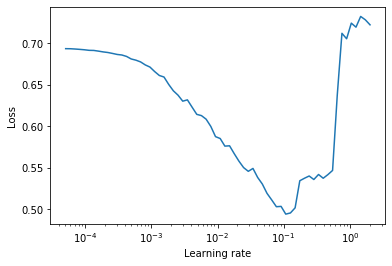

In [12]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'mnasnet0_5'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-5)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


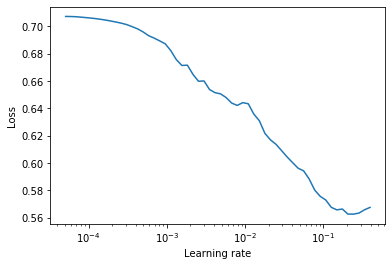

In [10]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'mnasnet0_5'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-5, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


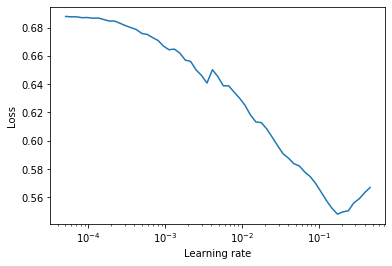

In [11]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=64)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'mnasnet0_5'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-5, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


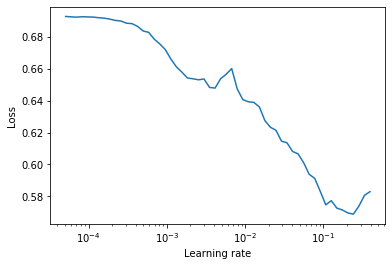

In [13]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=32)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'mnasnet0_5'
model = RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-5, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

### RMSprop with wd

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


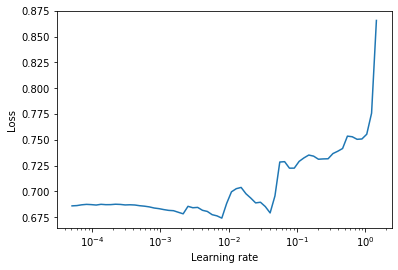

In [10]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=32)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'mnasnet0_5'
model = RumexNet(model_name)
optimizer = torch.optim.RMSprop(model.parameters(), lr=1.0e-5, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

### RMSProp without wd

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


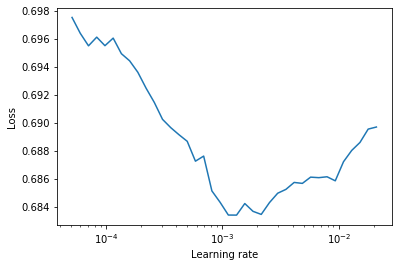

In [13]:
dstr = RumexDataset(path_tr, train_flag=True)
dltr = dstr.make_data_loader(bs=32)
loss_fn = nn.CrossEntropyLoss(reduction="mean")
model_name = 'mnasnet0_5'
model = RumexNet(model_name)
optimizer = torch.optim.RMSprop(model.parameters(), lr=1.0e-5, weight_decay=0.9, momentum=0.9)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state